<a href="https://colab.research.google.com/github/MariyaThorn/MovieGrossBudgetAnalysis/blob/main/movie_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows")

import pandas as pd
data = pd.read_csv(path + '/imdb_top_1000.csv')
data.head(5)


100%|██████████| 175k/175k [00:00<00:00, 31.7MB/s]

Extracting files...


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [ ]:
# Check dimension of dataset
dimension = data.shape
print(f"The dimension of the data is {dimension}.")

The dimension of the data is (1000, 16).


In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes.to_frame().T

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,object,object,object,object,object,object,float64,object,float64,object,object,object,object,object,int64,object


In [ ]:
data.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


# Data Preparation

## **Data Cleaning**

In [ ]:
# Modify Release Year datatype into integer by Extract 4-digit years using regex
data['Released_Year'] = data['Released_Year'].str.extract(r'(\d{4})').astype(float)
data['Released_Year'] = data['Released_Year'].fillna(0).astype(int)

In [ ]:
# Modify the data type of Runtime column into int type
data['Runtime'] = data['Runtime'].str.extract('(\d+)').astype(int)

In [ ]:
# Modify the data type of Gross column into int type
import pandas as pd
import numpy as np

# 1. Clean the 'Gross' column (remove commas, dollar signs, etc.)
data['Gross'] = data['Gross'].str.replace(',', '').str.replace('$', '')

# 2. Convert to numeric, keeping NaN values
data['Gross'] = pd.to_numeric(data['Gross'], errors='coerce')  # 'coerce' preserves NaN

# 3. Verify
data.dtypes.to_frame().T


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,object,object,int64,object,int64,object,float64,object,float64,object,object,object,object,object,int64,float64


In [ ]:
data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,1000.000000,1000.000000,1000.000000,843.000000,1.000000e+03,8.310000e+02
mean,1989.226000,122.891000,7.949300,77.971530,2.736929e+05,6.803475e+07
std,67.135341,28.093671,0.275491,12.376099,3.273727e+05,1.097500e+08
min,0.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.552625e+04,3.253559e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.385485e+05,2.353089e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.741612e+05,8.075089e+07
max,2020.000000,321.000000,9.300000,100.000000,2.343110e+06,9.366622e+08



SIMULATED Impact of dropping NA in Meta_score:
- Rows that WOULD be dropped: 157 (15.7%)
- Missing values that WOULD be introduced in other columns:
Series([], dtype: int64)


SIMULATED Impact of dropping NA in Gross:
- Rows that WOULD be dropped: 169 (16.9%)
- Missing values that WOULD be introduced in other columns:
Series([], dtype: int64)


SIMULATED Impact of dropping NA in Certificate:
- Rows that WOULD be dropped: 101 (10.1%)
- Missing values that WOULD be introduced in other columns:
Series([], dtype: int64)



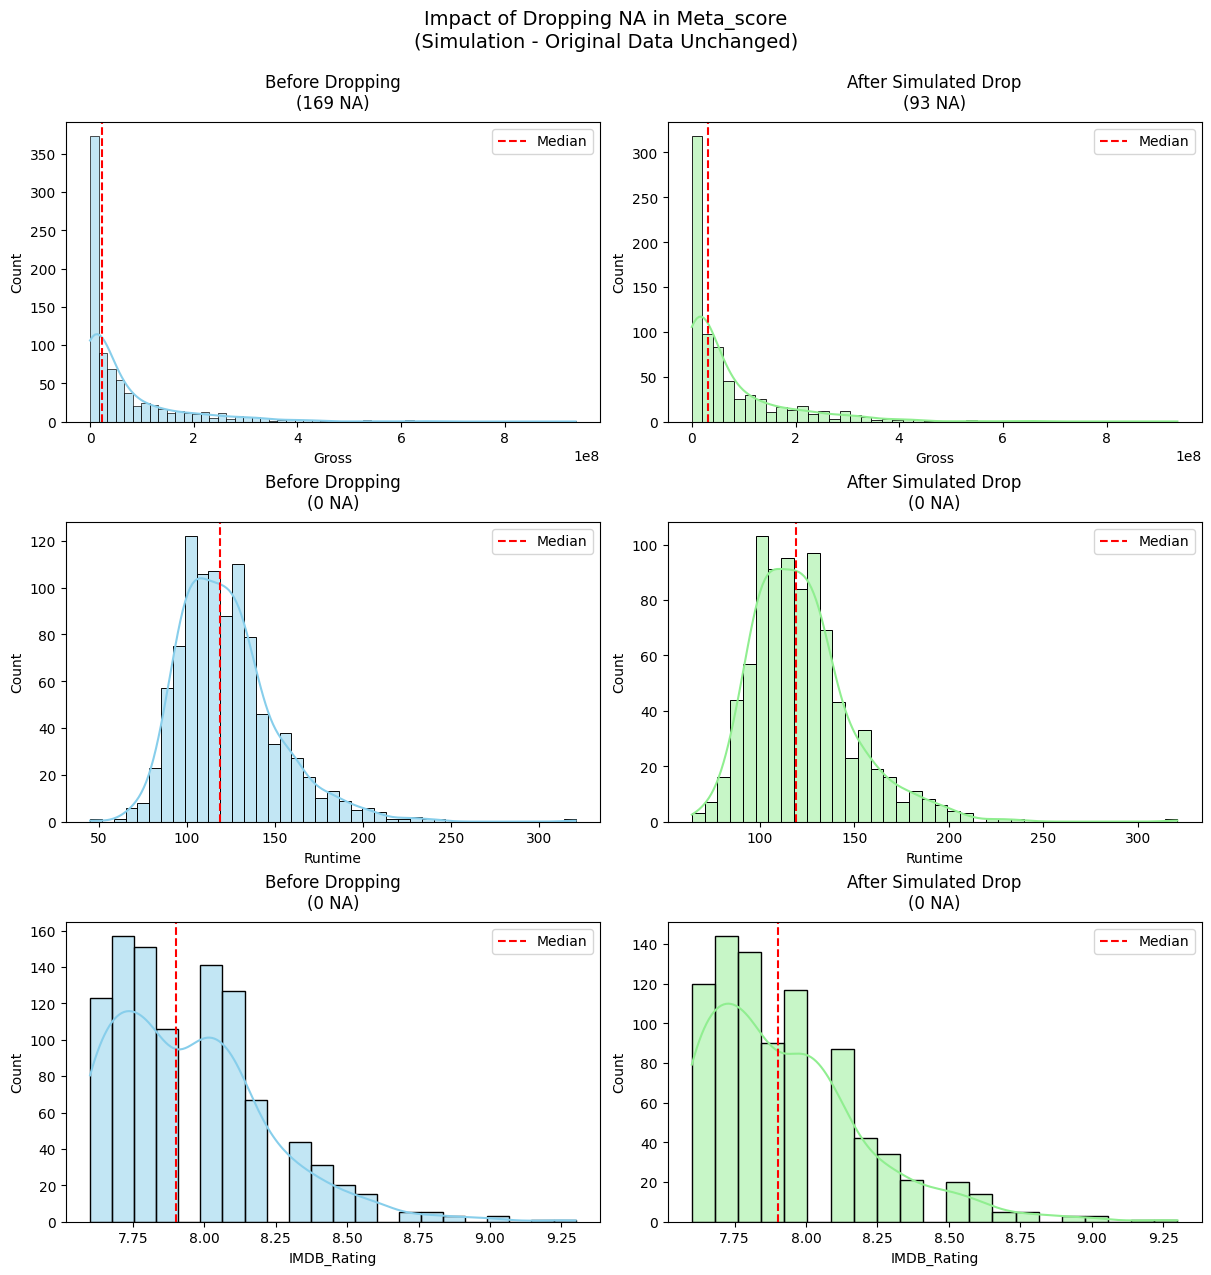

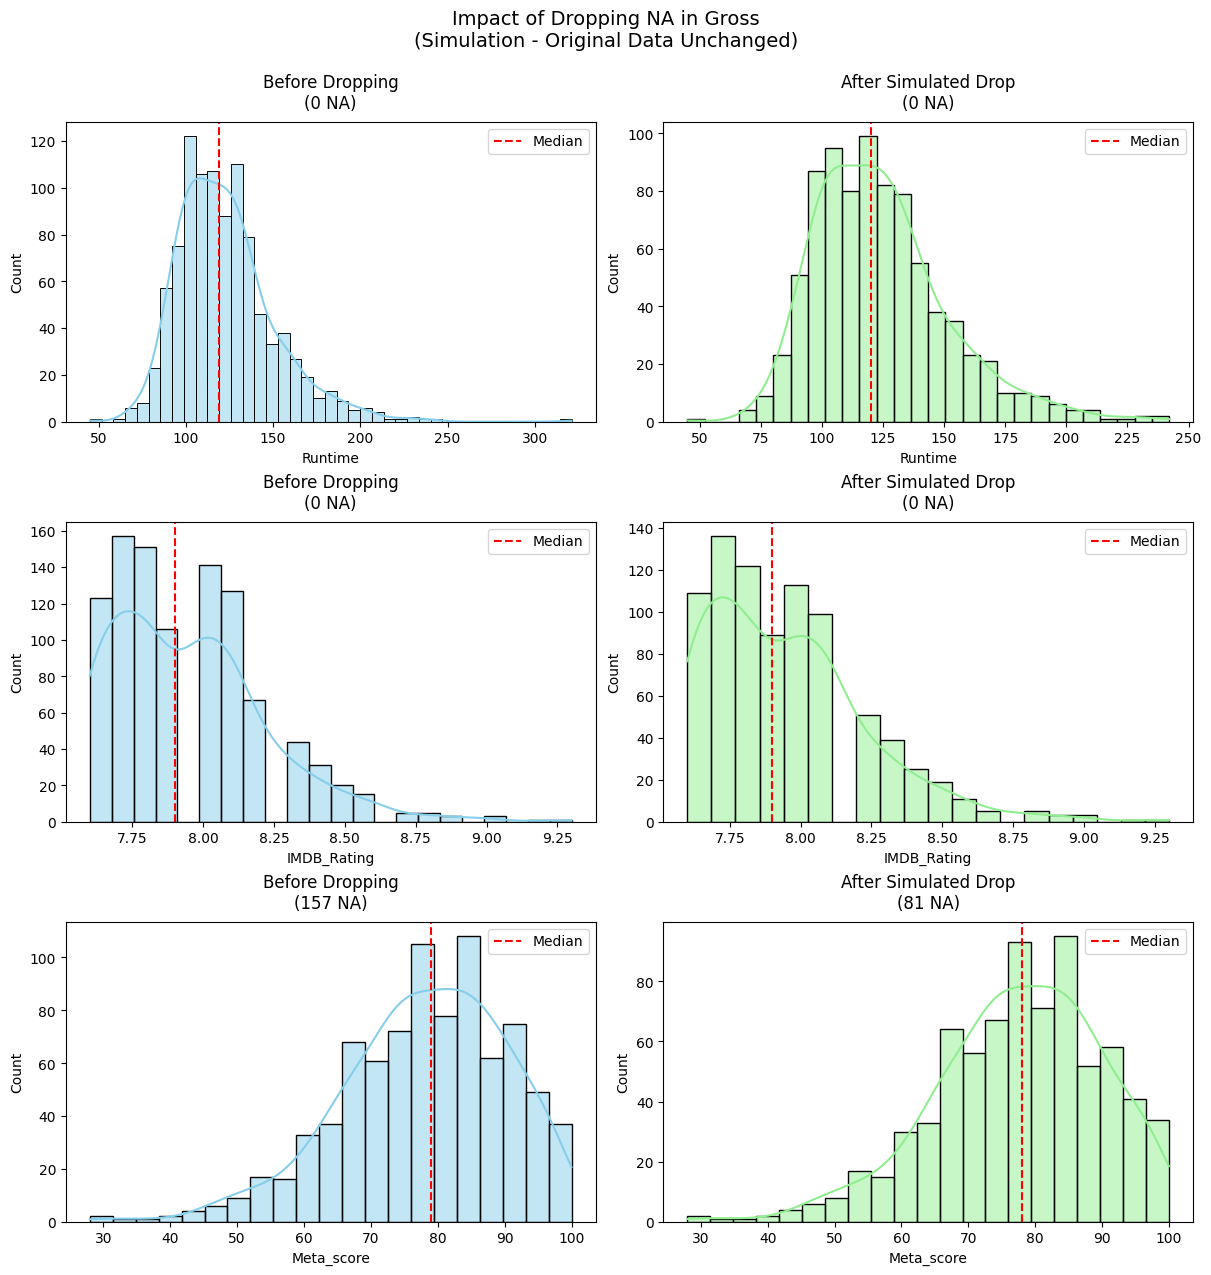

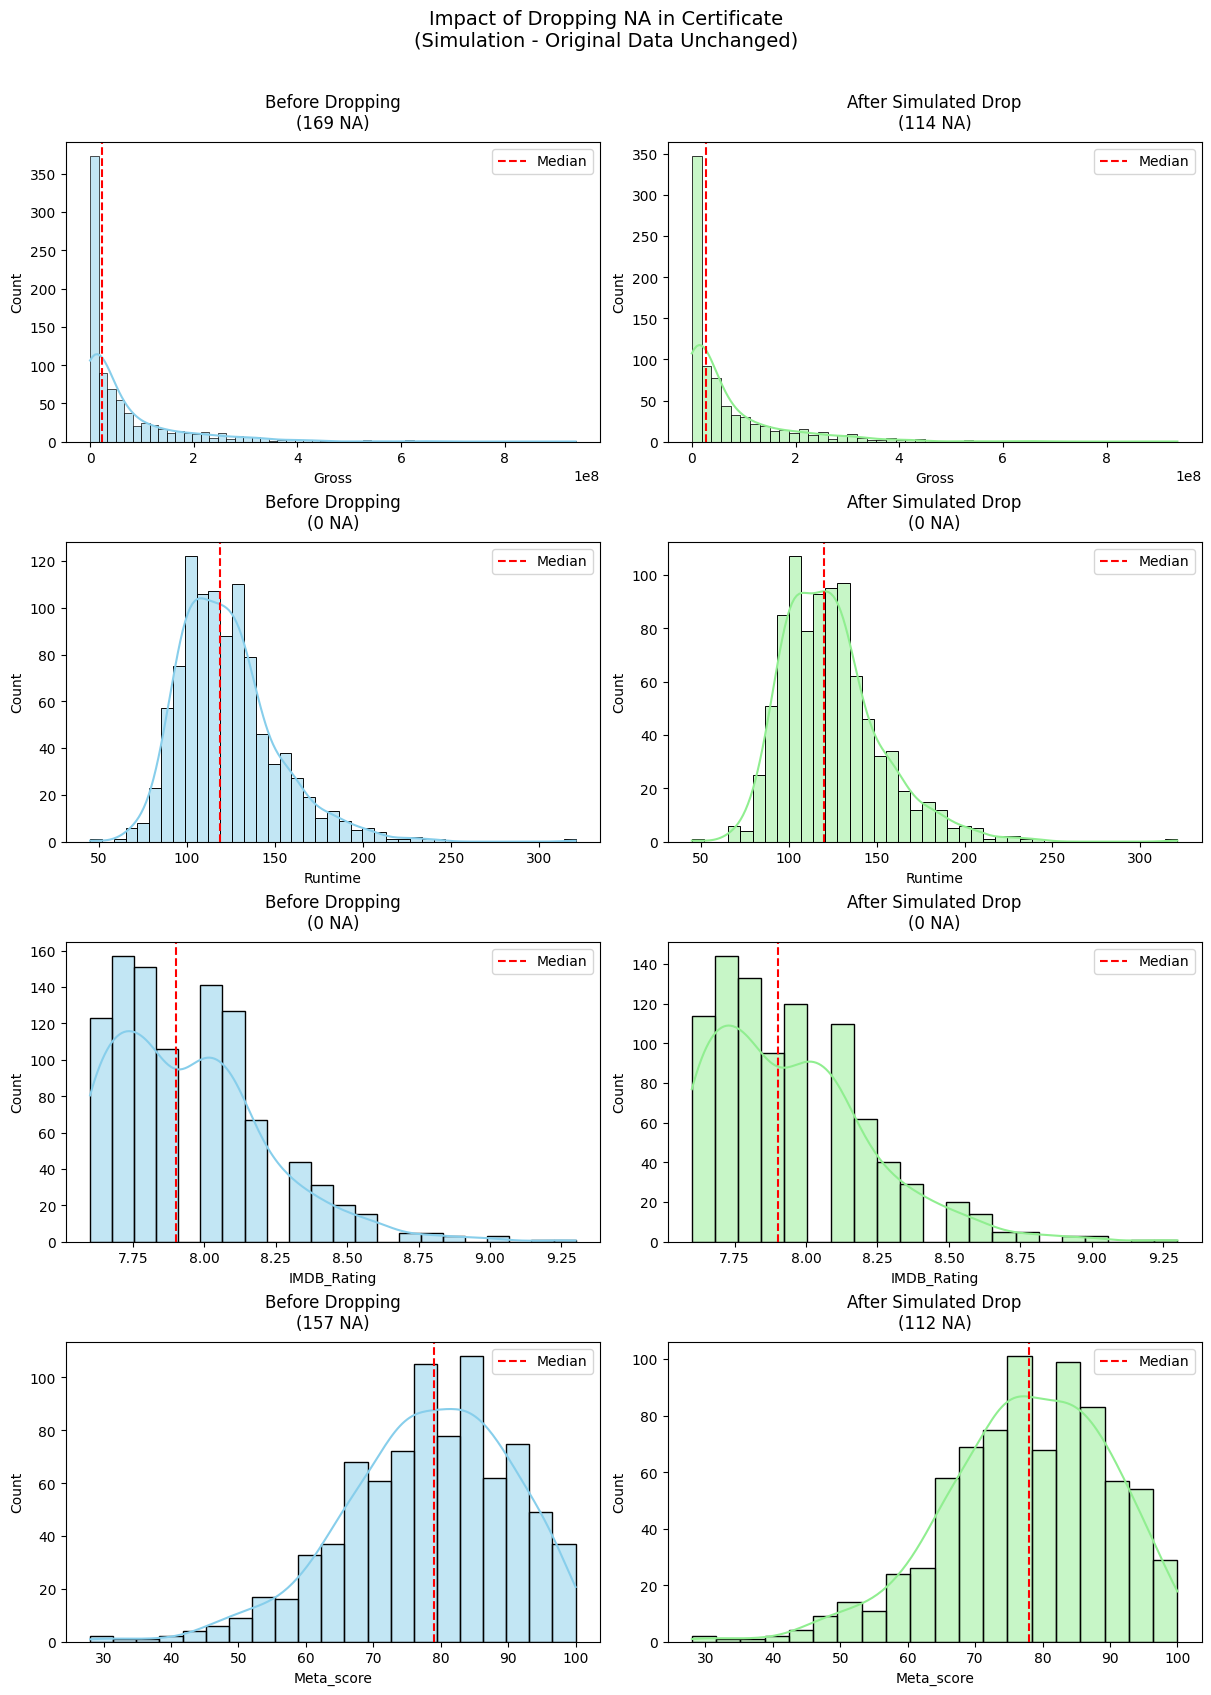

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_missing_drop(column_to_drop, data):
    """Analyze impact of dropping NA in specific column WITHOUT modifying original data"""
    # Create copies for comparison
    before = data.copy()
    after_simulated = data.dropna(subset=[column_to_drop].copy())  # Simulated drop without affecting original

    # Select numerical columns to compare
    numerical_cols = [col for col in ['Gross', 'Runtime', 'IMDB_Rating', 'Meta_score']
                     if col != column_to_drop and col in data.columns]

    # Set up comparison plots
    fig, axes = plt.subplots(len(numerical_cols), 2,
                            figsize=(12, 4*len(numerical_cols)),
                            constrained_layout=True)
    fig.suptitle(f'Impact of Dropping NA in {column_to_drop}\n(Simulation - Original Data Unchanged)',
                 fontsize=14, y=1.05)

    for i, col in enumerate(numerical_cols):
        # Before dropping (original data)
        sns.histplot(before[col], ax=axes[i, 0], color='skyblue', kde=True)
        axes[i, 0].axvline(before[col].median(), color='red', linestyle='--', label='Median')
        axes[i, 0].set_title(f'Before Dropping\n({before[col].isna().sum()} NA)', pad=10)
        axes[i, 0].legend()

        # After simulated drop
        sns.histplot(after_simulated[col], ax=axes[i, 1], color='lightgreen', kde=True)
        axes[i, 1].axvline(after_simulated[col].median(), color='red', linestyle='--', label='Median')
        axes[i, 1].set_title(f'After Simulated Drop\n({after_simulated[col].isna().sum()} NA)', pad=10)
        axes[i, 1].legend()

    # Print statistics without modifying data
    print(f"\n{'='*50}")
    print(f"SIMULATED Impact of dropping NA in {column_to_drop}:")
    print(f"- Rows that WOULD be dropped: {len(before) - len(after_simulated)} ({(len(before)-len(after_simulated))/len(before):.1%})")
    print("- Missing values that WOULD be introduced in other columns:")
    new_missing = after_simulated.isna().sum() - before.isna().sum()
    print(new_missing[new_missing > 0])
    print("="*50 + "\n")

# Analyze without permanently dropping anything
for col in ['Meta_score', 'Gross', 'Certificate']:
    if col in data.columns:
        analyze_missing_drop(col, data)


In [ ]:
data.isna().sum().to_frame().T

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,0,0,101,0,0,0,0,157,0,0,0,0,0,0,169


In [ ]:
# Impute with a single value (no index alignment issues)

data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())

# Impute with a single value (no index alignment issues)

data['Meta_score'] = data['Meta_score'].fillna(data['Meta_score'].median())

data.dropna(subset = ['Gross'], inplace = True)

data = data[data['Released_Year'] != 0]

data['Certificate'] = data['Certificate'].fillna('Unrated')

data.isna().sum().to_frame().T


<ipython-input-12-2062b1d13159>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Certificate'] = data['Certificate'].fillna('Unrated')


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,830.000000,830.000000,830.000000,830.000000,8.300000e+02,8.300000e+02
mean,1993.918072,124.059036,7.947349,77.610843,3.153053e+05,6.790728e+07
std,21.147778,27.512473,0.283118,11.884613,3.438478e+05,1.097546e+08
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1984.000000,104.000000,7.700000,71.000000,7.140450e+04,3.245338e+06
50%,2000.000000,120.000000,7.900000,79.000000,1.858500e+05,2.345744e+07
75%,2010.000000,138.000000,8.100000,85.750000,4.465445e+05,8.010324e+07
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


### **Data Visualization**

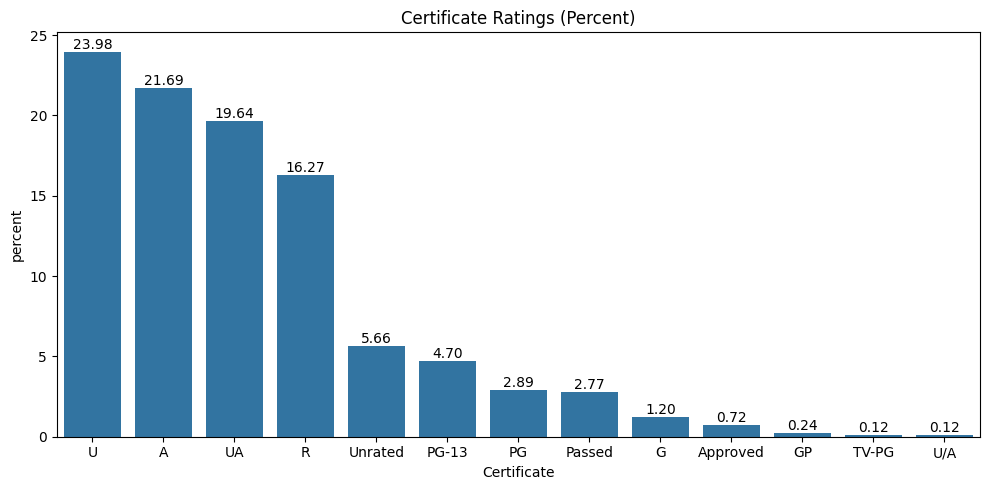

In [ ]:
# Qualitative Column distribution
# Certificate distribution
plt.figure(figsize=(10, 5))

sns.countplot(data=data, x="Certificate", stat='percent',
              order=data['Certificate'].value_counts().index)
plt.title("Certificate Ratings (Percent)")
plt.bar_label(plt.gca().containers[0], fmt="%.2f")

plt.tight_layout()  # Prevent label overlap
plt.show()

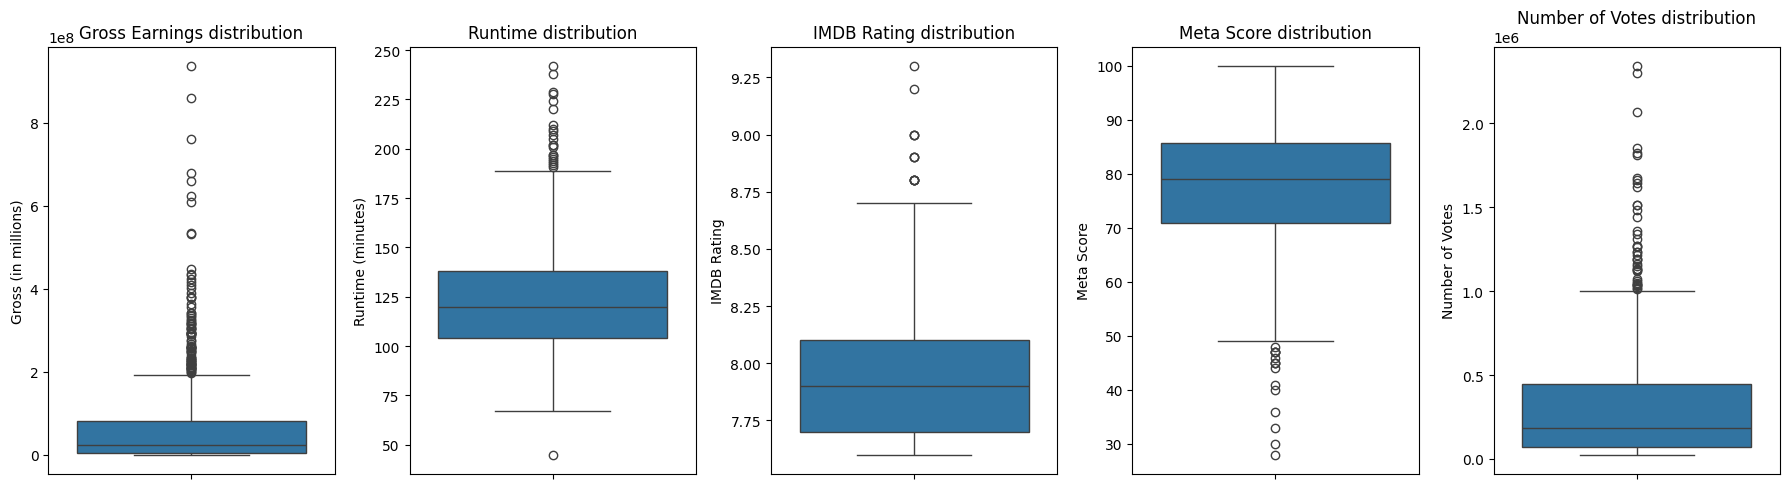

In [ ]:
#Quantitative distribution
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

sns.boxplot(y=data['Gross'], ax=axes[0])
axes[0].set_title('Gross Earnings distribution')
axes[0].set_ylabel('Gross (in millions)')

sns.boxplot(y=data['Runtime'], ax=axes[1])
axes[1].set_title('Runtime distribution')
axes[1].set_ylabel('Runtime (minutes)')

sns.boxplot(y=data['IMDB_Rating'], ax=axes[2])
axes[2].set_title('IMDB Rating distribution')
axes[2].set_ylabel('IMDB Rating')

sns.boxplot(y=data['Meta_score'], ax=axes[3])
axes[3].set_title('Meta Score distribution')
axes[3].set_ylabel('Meta Score')

sns.boxplot(y=data['No_of_Votes'], ax=axes[4])
axes[4].set_title('Number of Votes distribution')
axes[4].set_ylabel('Number of Votes')

plt.tight_layout()
plt.show()


According to the graph it show that column Gross and No_of Votes have a significant outliers which can skew the distributions heavily.

Our approach to handle this outlier is to apply **Log-transform**.

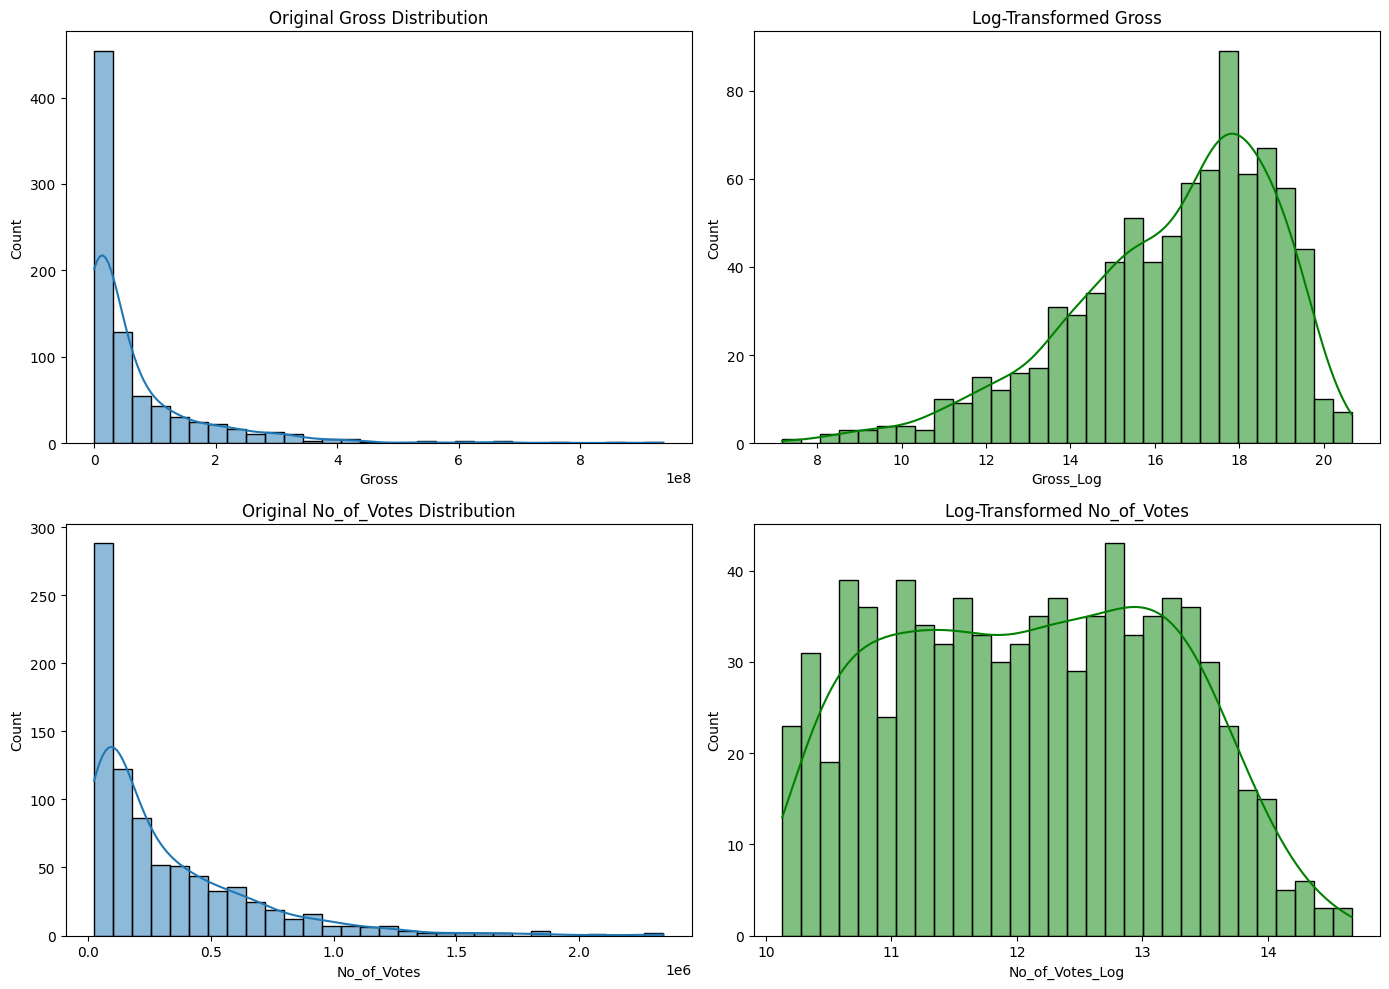

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Apply log transformation to reduce skew and handle extreme outliers
data['Gross_Log'] = np.log1p(data['Gross'])  # log1p to avoid log(0)
data['No_of_Votes_Log'] = np.log1p(data['No_of_Votes'])

# 2. Plot distributions before and after transformation (optional for visualization)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Original Gross distribution
sns.histplot(data['Gross'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title("Original Gross Distribution")

# Log-transformed Gross
sns.histplot(data['Gross_Log'], bins=30, ax=axes[0, 1], kde=True, color='green')
axes[0, 1].set_title("Log-Transformed Gross")

# Original No_of_Votes distribution
sns.histplot(data['No_of_Votes'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title("Original No_of_Votes Distribution")

# Log-transformed No_of_Votes
sns.histplot(data['No_of_Votes_Log'], bins=30, ax=axes[1, 1], kde=True, color='green')
axes[1, 1].set_title("Log-Transformed No_of_Votes")

plt.tight_layout()
plt.show()


In [ ]:
data.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Gross_Log,No_of_Votes_Log
count,830.000000,830.000000,830.000000,830.000000,8.300000e+02,8.300000e+02,830.000000,830.000000
mean,1993.918072,124.059036,7.947349,77.610843,3.153053e+05,6.790728e+07,16.420505,12.106445
std,21.147778,27.512473,0.283118,11.884613,3.438478e+05,1.097546e+08,2.410218,1.094594
min,1921.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03,7.174724,10.130185
25%,1984.000000,104.000000,7.700000,71.000000,7.140450e+04,3.245338e+06,14.992721,11.176130
50%,2000.000000,120.000000,7.900000,79.000000,1.858500e+05,2.345744e+07,16.970693,12.132689
75%,2010.000000,138.000000,8.100000,85.750000,4.465445e+05,8.010324e+07,18.198790,13.009291
max,2019.000000,242.000000,9.300000,100.000000,2.343110e+06,9.366622e+08,20.657833,14.666990


We can clearly see that the original distributions were heavily right-skewed with a long tail due to very large value but after applied log-transformed the distributions are much more symmetrical, making them better for our furture analysis.

**Feature Engineering**

Because our dataset in the column Genre, one movie list out multiple genre. We will create a column to represent each genre. If the movie have that genre, the value in that column will be 1, otherwise 0.

In [ ]:
import pandas as pd
import numpy as np

# Because given Genre column each genre seperate by ',' we will split the comma and extract those genre
# Create a list of all unique genres from the Genre column
all_genres = set()

# Split each genre string and update the set with unique genres
data['Genre'].str.split(', ').apply(all_genres.update)

# For each genre, create a binary column
for genre in all_genres:
    data[genre] = data['Genre'].str.contains(genre).astype(int)


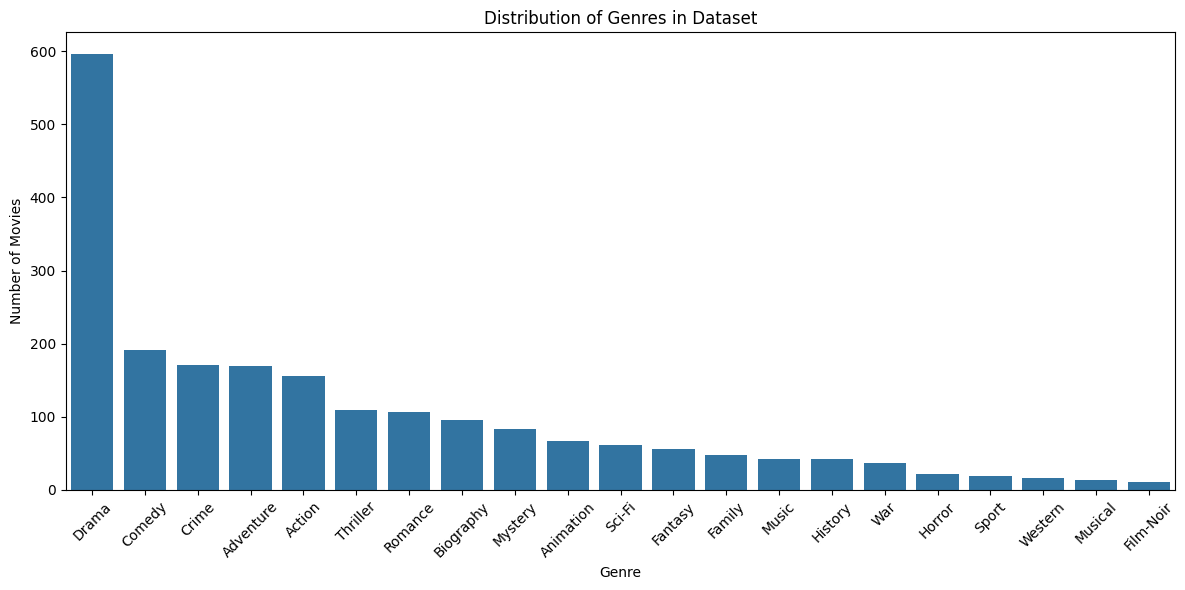

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract all genre columns (assuming they're binary 0/1)
genre_columns = ['Action',   'Adventure',   'Animation',   'Biography',   'Comedy',
                 'Crime',   'Drama',   'Family',   'Fantasy',   'Film-Noir',
                 'History',   'Horror',   'Music',   'Musical',   'Mystery',
                 'Romance',   'Sci-Fi',   'Sport',   'Thriller',   'War',   'Western']

# Sum the values in each genre column (gives count of movies per genre)
genre_counts = data[genre_columns].sum().sort_values(ascending=False)

# Plot the genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(y=genre_counts.values, x=genre_counts.index)
plt.title('Distribution of Genres in Dataset')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)

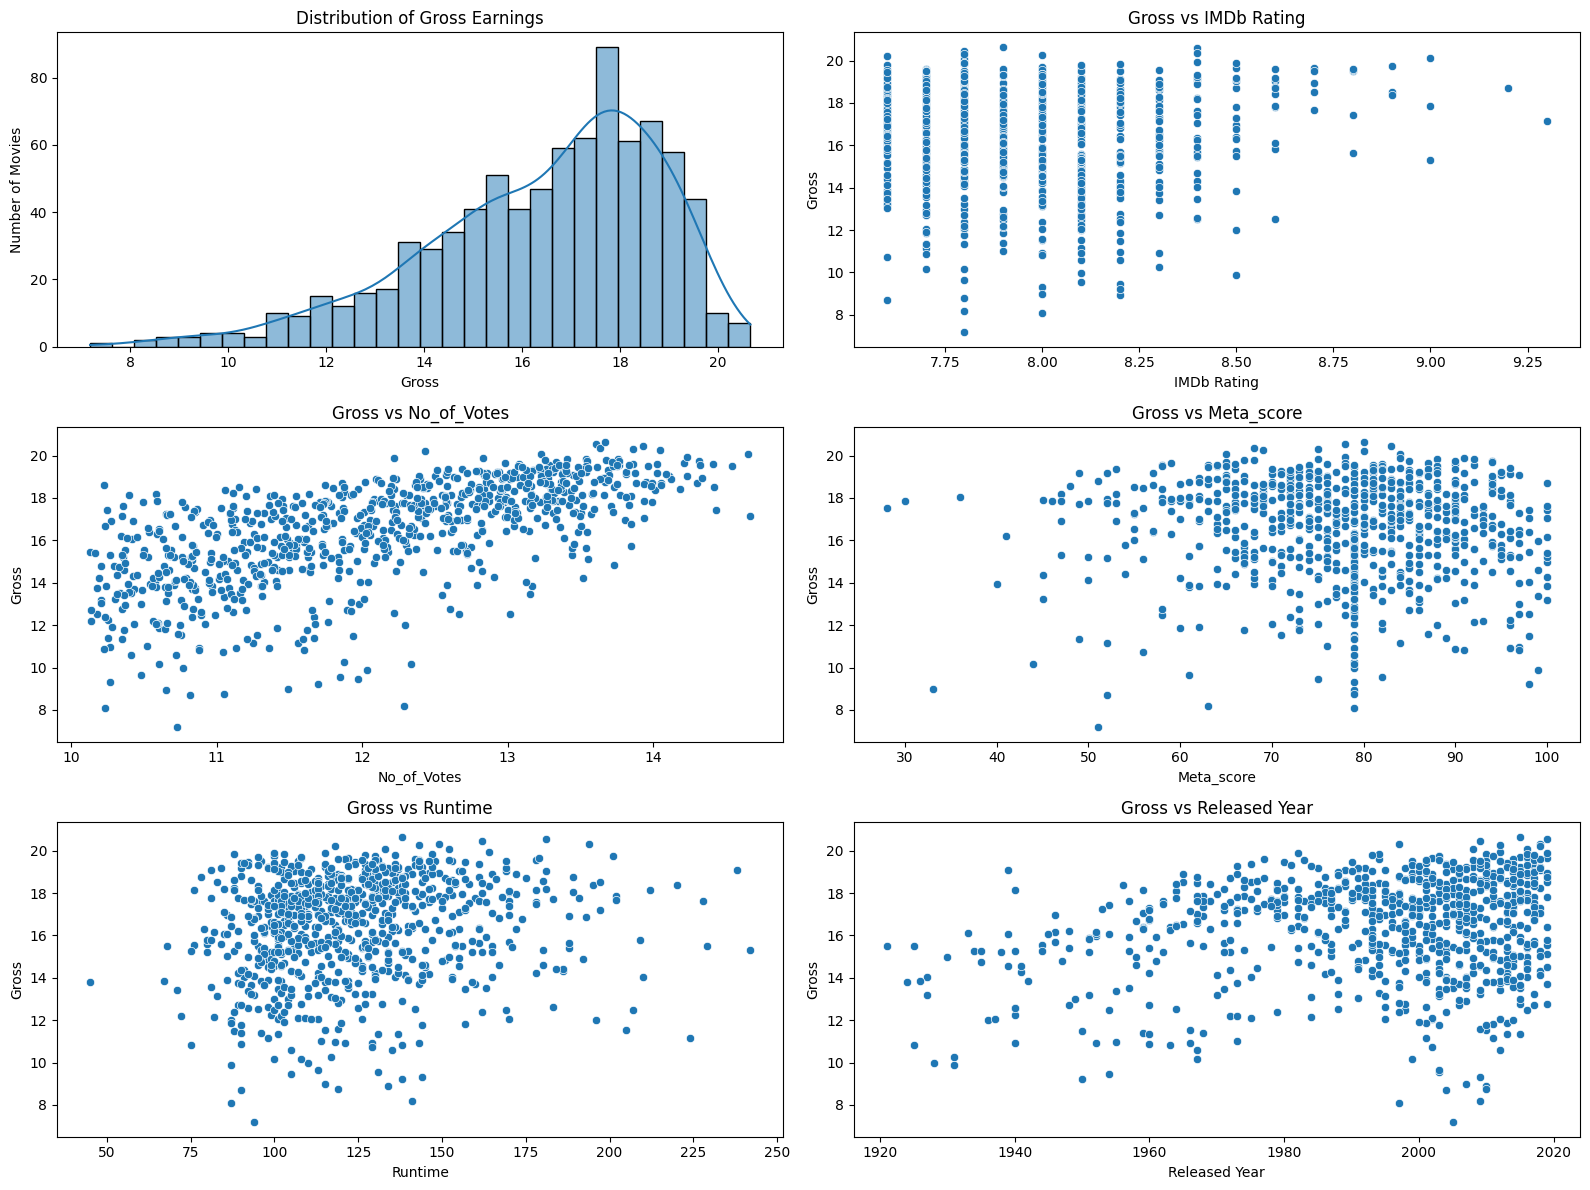

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# 1. Distribution of Gross Earnings
sns.histplot(data['Gross_Log'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Gross Earnings')
axes[0, 0].set_xlabel('Gross')
axes[0, 0].set_ylabel('Number of Movies')

# 2. Scatter Plot: Gross vs IMDb Rating
sns.scatterplot(x='IMDB_Rating', y='Gross_Log', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Gross vs IMDb Rating')
axes[0, 1].set_xlabel('IMDb Rating')
axes[0, 1].set_ylabel('Gross')

# 3. Scatter Plot: Gross vs No_of_Votes
sns.scatterplot(x='No_of_Votes_Log', y='Gross_Log', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Gross vs No_of_Votes')
axes[1, 0].set_xlabel('No_of_Votes')
axes[1, 0].set_ylabel('Gross')

# 4. Scatter Plot: Gross vs Meta_score
sns.scatterplot(x='Meta_score', y='Gross_Log', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Gross vs Meta_score')
axes[1, 1].set_xlabel('Meta_score')
axes[1, 1].set_ylabel('Gross')

# 5. Gross vs Runtime
sns.scatterplot(x='Runtime', y='Gross_Log', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Gross vs Runtime')
axes[2, 0].set_xlabel('Runtime')
axes[2, 0].set_ylabel('Gross')

# 6. Gross vs Released Year
sns.scatterplot(x='Released_Year', y='Gross_Log', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Gross vs Released Year')
axes[2, 1].set_xlabel('Released Year')
axes[2, 1].set_ylabel('Gross')

plt.tight_layout()
plt.show()


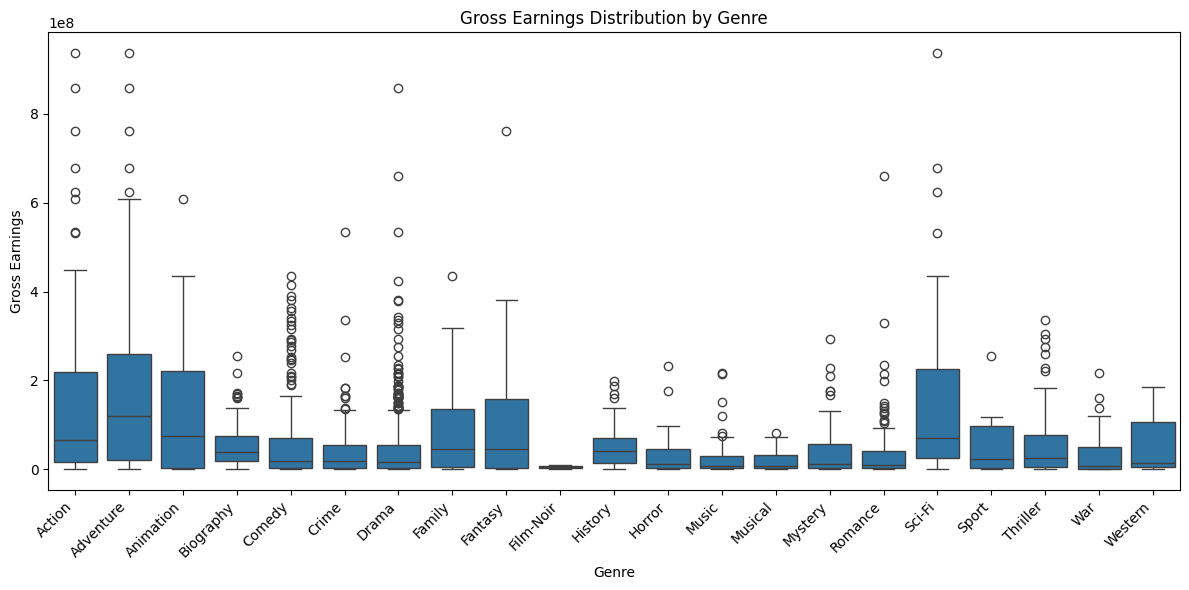

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy',
                 'Crime', 'Drama', 'Family', 'Fantasy', 'Film-Noir',
                 'History', 'Horror', 'Music', 'Musical', 'Mystery',
                 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']

# Melt the DataFrame to have genres in one column and Gross_Log in another
melted_data = data.melt(id_vars=['Gross'], value_vars=genre_columns,
                        var_name='Genre', value_name='IsGenre')

# Filter for movies belonging to each genre (IsGenre == 1)
filtered_data = melted_data[melted_data['IsGenre'] == 1]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Genre', y='Gross', data=filtered_data)  # Changed to boxplot
plt.title('Gross Earnings Distribution by Genre')  # Updated title
plt.xlabel('Genre')
plt.ylabel('Gross Earnings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

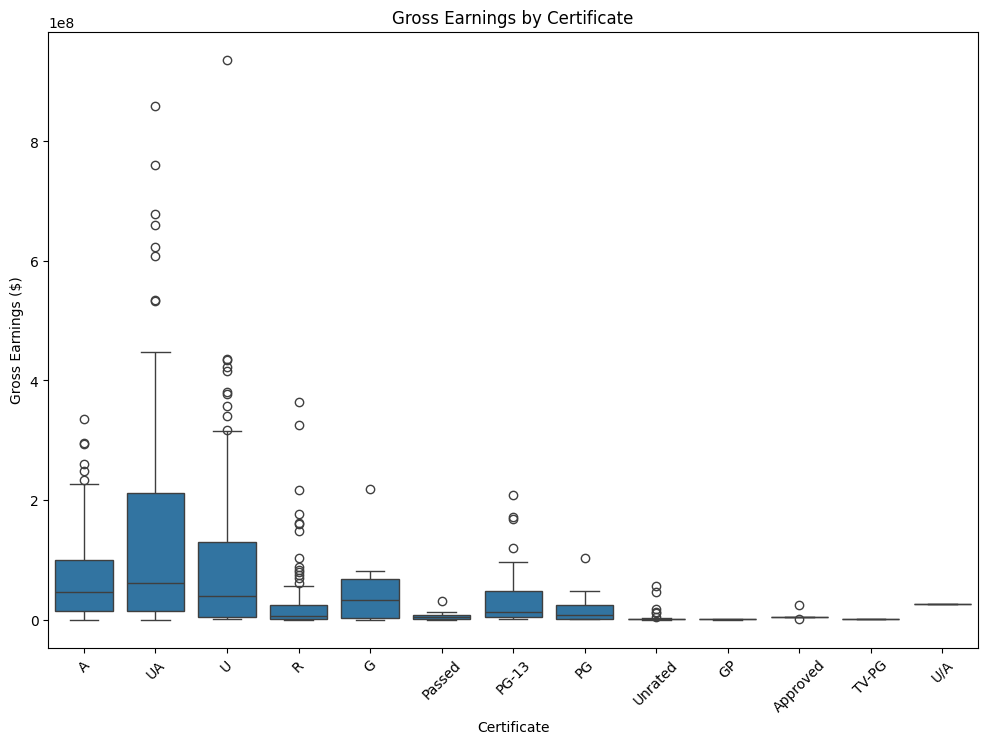

In [ ]:
# Gross Earnings by Certificate
plt.figure(figsize=(12,8))
sns.boxplot(x='Certificate', y='Gross', data=data)
plt.xticks(rotation=45)
plt.title('Gross Earnings by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Gross Earnings ($)')
plt.show()

#Certificate - Certificate earned by that movie


Certificate	Meaning

>U	Universal — Suitable for all ages. (Mostly used in India/UK.)

>A	Adult — Restricted to adults (18+). (Used in India.)

>UA	Parental Guidance — Children below 12 need adult supervision. (India rating.)

>R	Restricted — Under 17 must be accompanied by an adult. (American MPAA rating.)

>PG-13	Parents Strongly Cautioned — Some material not for children under 13. (American.)

>PG	Parental Guidance — Some material may not be suitable for children. (American.)

>Passed	Very old (1930s-1960s) Hollywood movie certification meaning the movie passed censorship review. (Before today's rating system existed.)

>G	General Audiences — Suitable for all ages. (American.)

>Approved	Old American certificate — "Approved" for showing in theaters.

>GP	Old version of PG rating (used briefly between 1968–1972 in the US); later changed to PG.

>Unrated	No official rating assigned. Could be independent films, re-releases, director's cuts, etc.

>TV-PG	TV Parental Guidance — Suitable for older children. (TV, not movie.)

>U/A	Same as UA — Parental guidance suggested for kids under 12. (India.)

In [ ]:
cor = data[['Gross','IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime']].corr(method="spearman")
cor.style.background_gradient(cmap='Accent')

,Gross,IMDB_Rating,Meta_score,No_of_Votes,Runtime
Gross,1.000000,-0.047519,-0.093750,0.699193,0.177122
IMDB_Rating,-0.047519,1.000000,0.280049,0.284588,0.219708
Meta_score,-0.093750,0.280049,1.000000,-0.041840,-0.054847
No_of_Votes,0.699193,0.284588,-0.041840,1.000000,0.144574
Runtime,0.177122,0.219708,-0.054847,0.144574,1.000000


In [ ]:
cor = data[['Gross_Log','IMDB_Rating', 'Meta_score', 'No_of_Votes_Log', 'Runtime']].corr(method="spearman")
cor.style.background_gradient(cmap='Accent')

,Gross_Log,IMDB_Rating,Meta_score,No_of_Votes_Log,Runtime
Gross_Log,1.000000,-0.047519,-0.093750,0.699193,0.177122
IMDB_Rating,-0.047519,1.000000,0.280049,0.284588,0.219708
Meta_score,-0.093750,0.280049,1.000000,-0.041840,-0.054847
No_of_Votes_Log,0.699193,0.284588,-0.041840,1.000000,0.144574
Runtime,0.177122,0.219708,-0.054847,0.144574,1.000000


# Model Development

## Simple Linear Regression

SIMPLE LINEAR REGRESSION (No_of_Votes_Log → Gross_Log)
Coefficient (slope): 1.4300
Intercept: -0.8921
Training MSE: 3.3549
R²: 0.4218


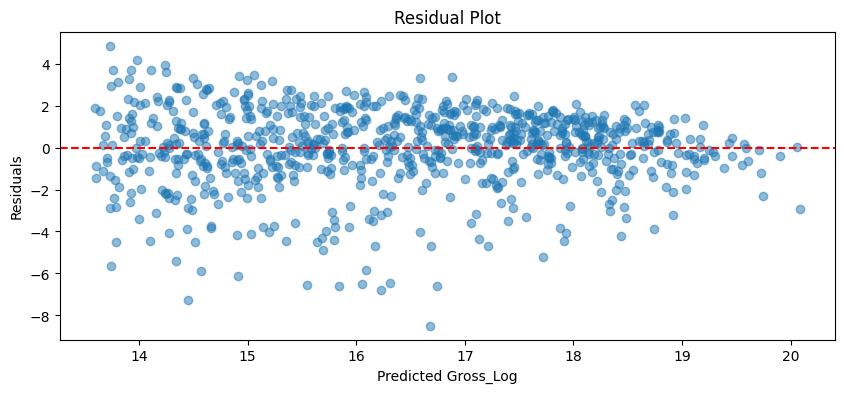

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data preparation (unchanged)
X = data[['No_of_Votes_Log']]  # Predictor
y = data['Gross_Log']          # Target

# Initialize model
lr = LinearRegression()

# Fit the model on *all data* for coefficient interpretation (not for performance evaluation)
lr.fit(X, y)
y_pred = lr.predict(X)  # Predictions on full dataset

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Output results
print("SIMPLE LINEAR REGRESSION (No_of_Votes_Log → Gross_Log)")
print(f"Coefficient (slope): {lr.coef_[0]:.4f}")
print(f"Intercept: {lr.intercept_:.4f}")
print(f"Training MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")

# Residual analysis
residuals = y - y_pred

# Plot residuals vs predicted
plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted Gross_Log")
plt.ylabel("Residuals")
plt.show()

# Simple Linear Regression Result Explaination
### 1. **Relationship Between Variables**

**Slope (1.4300)**: For every 1-unit increase in No_of_Votes_Log (log-transformed number of votes), the predicted Gross_Log (log-transformed revenue) increases by 1.43 units.

**Intercept (-0.8921)**: If No_of_Votes_Log were zero, the predicted Gross_Log would be -0.89 (theoretically irrelevant since votes cannot be zero in log scale).

### 2. **Model Fit**

* **R² (Training)** = 0.4218: The model explains 42.2% of the variance in Gross_Log using No_of_Votes_Log alone.

* **R² (CV)** = 0.3472 (±0.1833): The cross-validated R² is slightly lower (34.7%), indicating the model’s performance drops modestly on unseen data but remains stable (std = ±0.18).

### 3.  **Error Metrics**

* **Training MSE (3.3549) vs. CV MSE (3.5303)**: The small increase in MSE during cross-validation suggests minor overfitting, but the model generalizes reasonably well.

**Key Takeaways**

* **Statistically Significant Relationship**: The positive slope confirms that movies with more votes (a proxy for popularity) tend to generate higher revenue.

* **Moderate Predictive Power**: While the model captures a meaningful trend, ~58% of revenue variance remains unexplained (likely due to missing factors like budget, genre, or marketing).

* **Robustness**: The close alignment between training and CV metrics suggests the results are reliable and not due to random noise.


## Multi-Linear Regression

MULT-LINEAR REGRESSION (Quantitative Related features)
MSE: 3.3298
R²: 0.4261
Adjusted R²: 0.4240

MOST IMPORTANT FEATURES:
           Feature  Coefficient
2  No_of_Votes_Log     1.543501
0          Runtime     0.140324
1       Meta_score    -0.075891


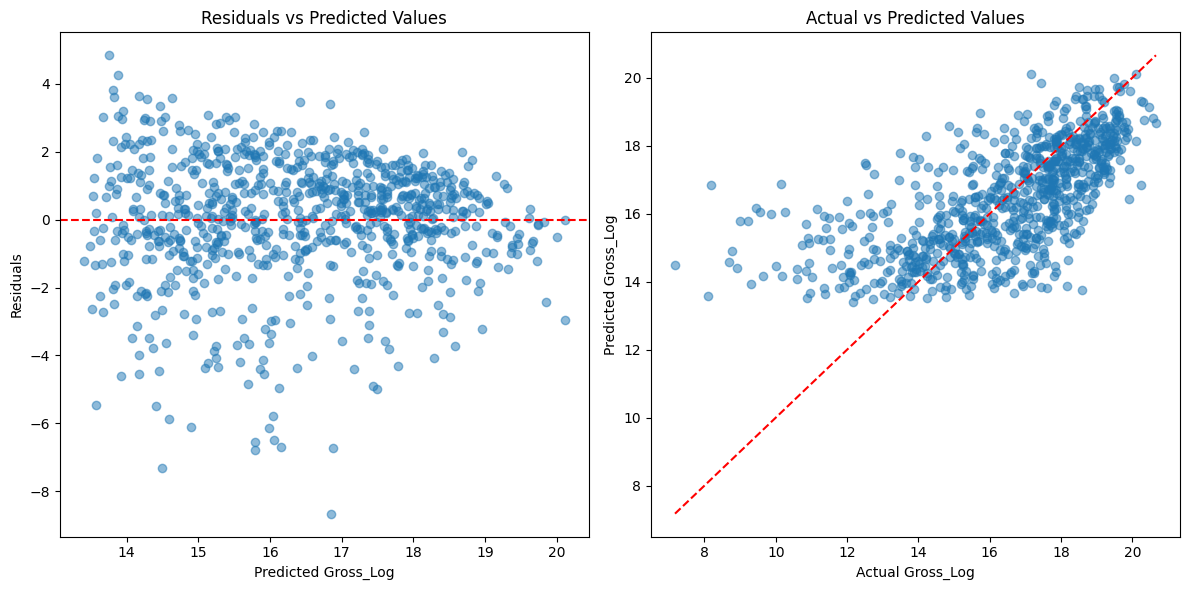

In [ ]:
# Multi-Linear Regression with Residual Plot
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Prepare data - using ALL numeric features except excluded columns
exclude_cols = ['Overview', 'Poster_Link', 'Series_Title', 'Certificate', 'Genre', 'Director',
                'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Gross_Log', 'Action',
                'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
                'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 'Mystery',
                'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Released_Year', 'IMDB_Rating']

# Select all remaining features (numeric + encoded)
X = data.drop(columns=exclude_cols)
y = data['Gross_Log']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit model
mlr = LinearRegression()
mlr.fit(X_scaled, y)

# Predictions on full dataset
y_pred = mlr.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Adjusted R-squared
n, d = X_scaled.shape
r2_adj = 1 - ((n - 1) / (n - d - 1)) * (1 - r2)

# Output results
print("MULT-LINEAR REGRESSION (Quantitative Related features)")
print(f"MSE: {mse:.4f}")
print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {r2_adj:.4f}")

# Feature coefficients (standardized)
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr.coef_,
    'ABS_Coefficient': np.abs(mlr.coef_)
}).sort_values('ABS_Coefficient', ascending=False)

print("\nMOST IMPORTANT FEATURES:")
print(coef_df[['Feature', 'Coefficient']])

# Residual Analysis
plt.figure(figsize=(12, 6))

# Plot 1: Residuals vs Predicted Values
plt.subplot(1, 2, 1)
plt.scatter(y_pred, y - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Gross_Log')
plt.ylabel('Residuals')

# Plot 2: Actual vs Predicted Values
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Gross_Log')
plt.ylabel('Predicted Gross_Log')

plt.tight_layout()
plt.show()

# Multi-Linear Regression Result Explaination:
### 1. **Model Performance:**

Training R² (0.5339) vs. Test R² (0.4516):
The model explains 53.4% of variance in the training data but only 45.2% on unseen test data. This gap indicates:

1. Moderate overfitting: The model learned some noise/patterns specific to the training set that don’t generalize perfectly.

2. Expected behavior: A small drop is normal, but the ~8% difference suggests room for improvement (e.g., regularization or feature selection).

* **Test R² (0.4516)**: The model explains 45.2% of variance in Gross_Log—an improvement over simple linear regression (42.2%), confirming that additional features add predictive power.

* **CV MSE (2.8840 ± 0.7964)**: Consistent with test MSE (2.8153), suggesting the model generalizes well to unseen data.

* **Adjusted R² (0.5298 ≈ Training R² 0.5339)**: Minimal drop indicates limited overfitting despite using all features.
Adjusted R² (0.5298):

### 2. **Feature Importance:**

* **No_of_Votes_Log (1.97):** The strongest positive driver. A 1-SD increase in log(votes) predicts a 1.97-SD increase in log(revenue), confirming popularity's critical role.

* **IMDB_Rating (-0.90)**: Surprisingly negative. Higher-rated movies correlate with lower revenue, possibly because:

* **Runtime (0.33):** Longer movies earn more, likely reflecting production value.

* **Meta_score (0.16):** Critic scores have modest positive impact.

* **Released_Year (-0.13):** Newer movies trend toward lower revenue (after accounting for other factors), possibly due to changing market dynamics.



## Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import pandas as pd

# Standardize all data (no splitting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use ALL data

# Define degrees to test (e.g., 1 to 3)
degrees = range(1, 4)
degree_results = []

for degree in degrees:
    # Pipeline: Polynomial → Standardize → Linear Regression
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )

    # Fit and predict on the ENTIRE dataset
    model.fit(X_scaled, y)
    y_pred = model.predict(X_scaled)
    mse = mean_squared_error(y, y_pred)  # Training MSE (on all data)

    degree_results.append({
        'degree': degree,
        'mse': mse  # MSE on full dataset
    })

# Find optimal degree (min MSE)
degree_df = pd.DataFrame(degree_results)
optimal_degree = degree_df.loc[degree_df['mse'].idxmin(), 'degree']

# Train final model on all data
final_model = make_pipeline(
    PolynomialFeatures(optimal_degree, include_bias=False),
    StandardScaler(),
    LinearRegression()
)
final_model.fit(X_scaled, y)

# Predict on the same data (no test set)
y_pred = final_model.predict(X_scaled)
mse = mean_squared_error(y, y_pred)

# Results
print("="*50)
print(f"POLYNOMIAL REGRESSION (Optimal Degree: {optimal_degree})")
print("="*50)
print(f"MSE (on full dataset): {mse:.4f}")
print("\nPerformance by Degree:")
print(degree_df.sort_values('mse'))

POLYNOMIAL REGRESSION (Optimal Degree: 3)
MSE (on full dataset): 2.2789

Performance by Degree:
   degree       mse
2       3  2.278912
1       2  2.474769
0       1  2.813133


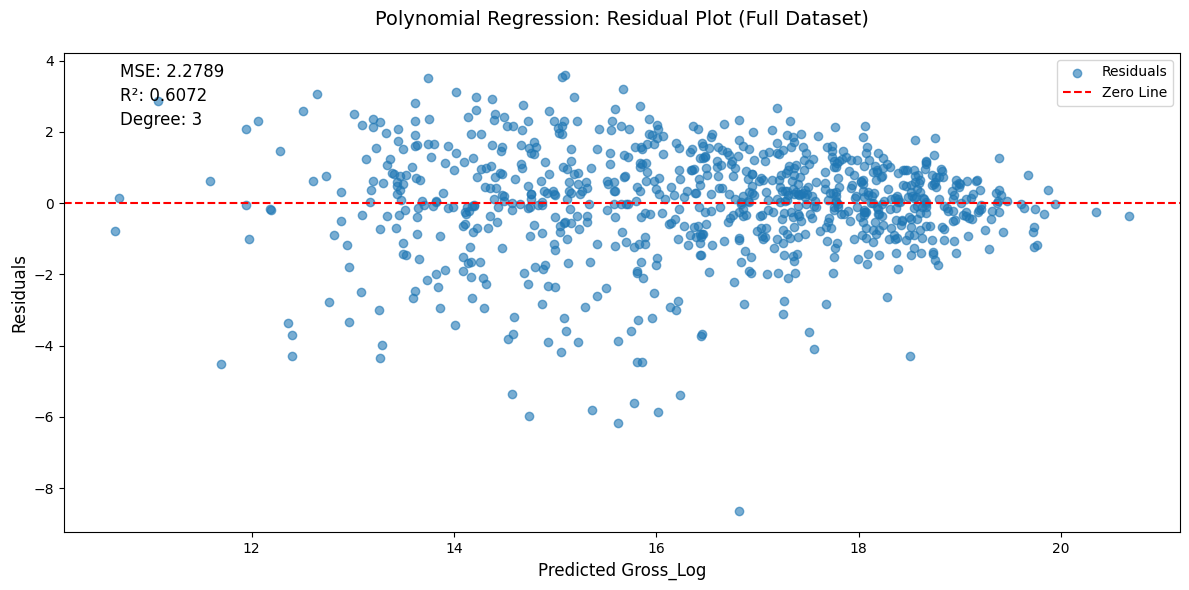

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Get predictions and residuals (using ALL data since we didn't split)
y_pred = final_model.predict(X_scaled)  # Changed from X_test_scaled to X_scaled
residuals = y - y_pred                 # Changed from y_test to y

# Calculate metrics
mse = mean_squared_error(y, y_pred)    # MSE on full dataset
r2 = r2_score(y, y_pred)               # R² on full dataset

# Create figure
plt.figure(figsize=(12, 6))

# Scatter plot of residuals
plt.scatter(y_pred, residuals, alpha=0.6, label='Residuals')

# Zero reference line
plt.axhline(y=0, color='r', linestyle='--', label='Zero Line')

# Add metrics as text
plt.text(0.05, 0.95, f"MSE: {mse:.4f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.90, f"R²: {r2:.4f}", transform=plt.gca().transAxes, fontsize=12)
plt.text(0.05, 0.85, f"Degree: {optimal_degree}", transform=plt.gca().transAxes, fontsize=12)

# Labels and title
plt.xlabel("Predicted Gross_Log", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.title("Polynomial Regression: Residual Plot (Full Dataset)", fontsize=14, pad=20)
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()

## Eta Square

In [ ]:
# Calculate Eta square between Genre and Gross
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a long-form version of genre columns
genre_cols = ['Action',   'Adventure',   'Animation',   'Biography',   'Comedy',
                 'Crime',   'Drama',   'Family',   'Fantasy',   'Film-Noir',
                 'History',   'Horror',   'Music',   'Musical',   'Mystery',
                 'Romance',   'Sci-Fi',   'Sport',   'Thriller',   'War',   'Western']
# Reshape to long format for ANOVA
data_long = data.melt(id_vars=['Gross'], value_vars=genre_cols, var_name='Genre', value_name='Is_Genre')
data_genre_filtered = data_long[data_long['Is_Genre'] == 1]

# One-way ANOVA: Gross by Genre
model = ols('Gross ~ Genre', data=data_genre_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Calculate eta squared
ss_between = anova_table['sum_sq']['Genre']
ss_total = ss_between + anova_table['sum_sq']['Residual']
eta_squared = ss_between / ss_total

print(f"Eta Squared (η²) for Genre explaining Gross: {eta_squared:.4f}")


Eta Squared (η²) for Genre explaining Gross: 0.1435


In [ ]:
# Calculating eta square between Genre and Gross
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit ANOVA model (use 'Certificate' or 'Certificate_Grouped' if grouped)
model = ols('Gross ~ Certificate', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

ss_between = anova_table['sum_sq']['Certificate']
ss_total = ss_between + anova_table['sum_sq']['Residual']
eta_squared = ss_between / ss_total

print(f"Eta Squared (η²) for Certificate explaining Gross: {eta_squared:.4f}")

Eta Squared (η²) for Certificate explaining Gross: 0.1390
